In [ ]:
!unzip -o data.zip

Archive:  data.zip
   creating: processed/
   creating: processed/H1N1_drop_duplicates/
  inflating: processed/H1N1_drop_duplicates/triplet_cluster_test.csv  
  inflating: processed/H1N1_drop_duplicates/triplet_cluster_train.csv  
   creating: processed/COV19/
  inflating: processed/COV19/triplet_cluster_test.csv  
  inflating: processed/COV19/triplet_cluster_train_baseline.txt  
  inflating: processed/COV19/triplet_cluster_train.csv  
  inflating: processed/COV19/protVec_100d_3grams.csv  
  inflating: processed/COV19/triplet_cluster_test_baseline.txt  
   creating: processed/H1N1/
  inflating: processed/H1N1/triplet_random_train_baseline.txt  
  inflating: processed/H1N1/triplet_clustering_train.csv  
  inflating: processed/H1N1/triplet_clustering_test_baseline.txt  
  inflating: processed/H1N1/triplet_random_train.csv  
  inflating: processed/H1N1/triplet_random_test.csv  
  inflating: processed/H1N1/triplet_clustering_test.csv  
  inflating: processed/H1N1/triplet_random_test_baseli


Experimental results with model transformer on subtype COV19:
Class imbalances:
 Training 0.502
 Testing  0.510


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 9 Time  0m  3s
T_loss 0.446	T_acc 0.725	T_pre 0.793	T_rec 0.727	T_fscore 0.759	T_mcc 0.549
V_loss 0.719	V_acc 0.638	V_pre 0.666	V_rec 0.526	V_fscore 0.588	V_mcc 0.279
Epoch 19 Time  0m  5s
T_loss 0.331	T_acc 0.782	T_pre 0.844	T_rec 0.806	T_fscore 0.825	T_mcc 0.661
V_loss 0.976	V_acc 0.597	V_pre 0.579	V_rec 0.655	V_fscore 0.615	V_mcc 0.198
Epoch 29 Time  0m  7s
T_loss 0.338	T_acc 0.778	T_pre 0.860	T_rec 0.774	T_fscore 0.815	T_mcc 0.661
V_loss 1.293	V_acc 0.599	V_pre 0.563	V_rec 0.819	V_fscore 0.667	V_mcc 0.228
Epoch 39 Time  0m 10s
T_loss 0.336	T_acc 0.772	T_pre 0.806	T_rec 0.839	T_fscore 0.822	T_mcc 0.655
V_loss 1.019	V_acc 0.629	V_pre 0.655	V_rec 0.517	V_fscore 0.578	V_mcc 0.261
Epoch 49 Time  0m 13s
T_loss 0.251	T_acc 0.802	T_pre 0.860	T_rec 0.837	T_fscore 0.848	T_mcc 0.702
V_loss 1.477	V_acc 0.621	V_pre 0.615	V_rec 0.605	V_fscore 0.610	V_mcc 0.241
Epoch 59 Time  0m 15s
T_loss 0.255	T_acc 0.804	T_pre 0.868	T_rec 0.832	T_fscore 0.849	T_mcc 0.709
V_loss 1.634	V_acc 0.626	V_pre 0.

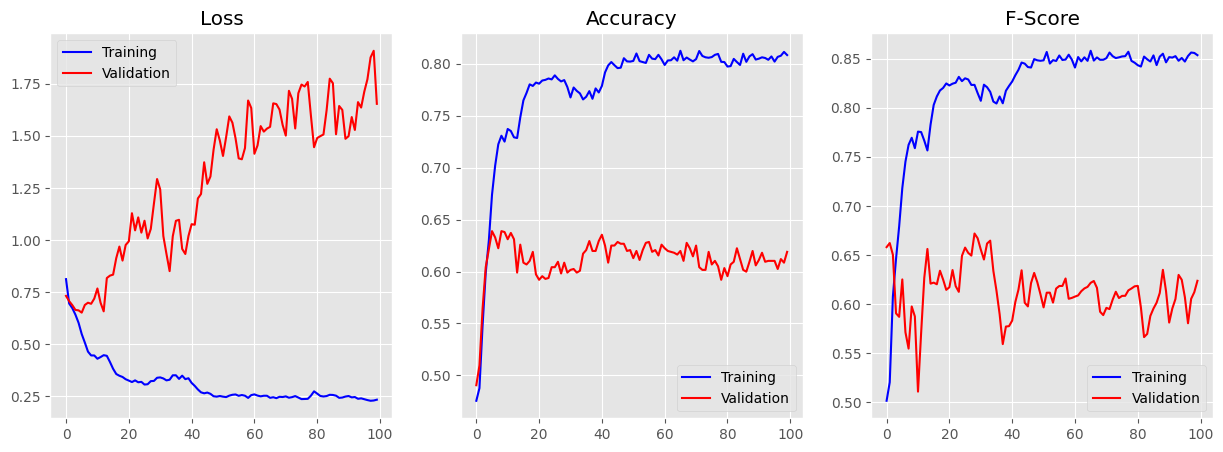

Best results: Epoch 5 
 V_loss 0.651	V_acc 0.639	V_pre 0.637	V_rec 0.614	V_fscore 0.625	V_mcc 0.277

Experimental results with model mutagan on subtype COV19:
Class imbalances:
 Training 0.502
 Testing  0.510
Epoch 9 Time  0m  4s
T_loss 0.560	T_acc 0.657	T_pre 0.674	T_rec 0.764	T_fscore 0.716	T_mcc 0.394
V_loss 0.655	V_acc 0.618	V_pre 0.597	V_rec 0.681	V_fscore 0.636	V_mcc 0.240
Epoch 19 Time  0m  9s
T_loss 0.409	T_acc 0.743	T_pre 0.794	T_rec 0.778	T_fscore 0.786	T_mcc 0.574
V_loss 0.781	V_acc 0.610	V_pre 0.601	V_rec 0.612	V_fscore 0.606	V_mcc 0.221
Epoch 29 Time  0m 13s
T_loss 0.352	T_acc 0.766	T_pre 0.818	T_rec 0.801	T_fscore 0.810	T_mcc 0.626
V_loss 0.934	V_acc 0.609	V_pre 0.591	V_rec 0.662	V_fscore 0.624	V_mcc 0.222
Epoch 39 Time  0m 18s
T_loss 0.295	T_acc 0.788	T_pre 0.841	T_rec 0.826	T_fscore 0.834	T_mcc 0.669
V_loss 1.146	V_acc 0.608	V_pre 0.597	V_rec 0.616	V_fscore 0.606	V_mcc 0.216
Epoch 49 Time  0m 22s
T_loss 0.246	T_acc 0.796	T_pre 0.851	T_rec 0.834	T_fscore 0.842	T_mcc 0.68

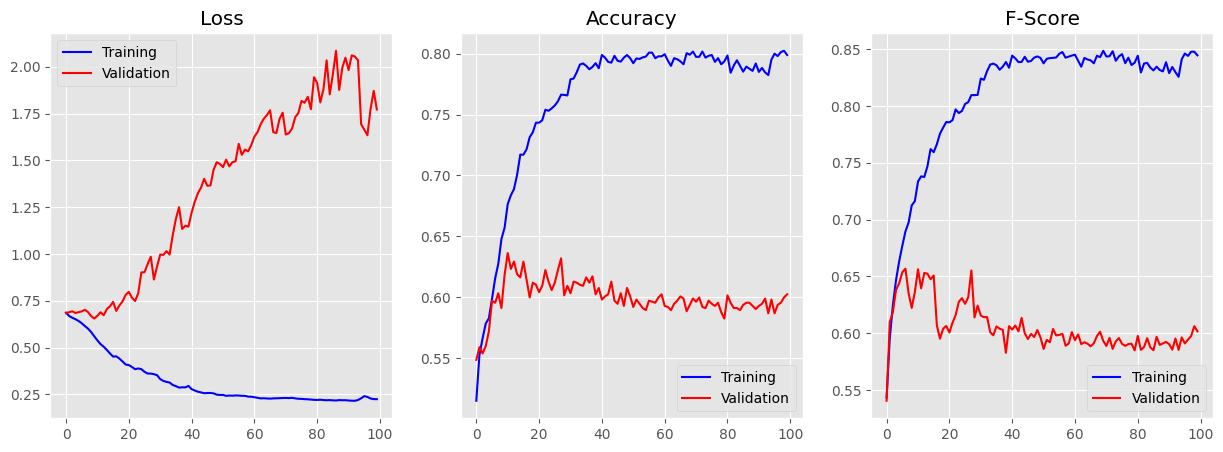

Best results: Epoch 10 
 V_loss 0.670	V_acc 0.636	V_pre 0.612	V_rec 0.708	V_fscore 0.656	V_mcc 0.278


In [ ]:
"""
Influenza and SARS-CoV-2 Mutation Prediction using Machine Learning Models

This script processes protein sequence data, performs clustering, and trains various machine learning models
(RNN, LSTM, GRU, Transformer, Attention-based models, MutaGAN, and baseline classifiers) to predict mutations
in influenza (H1N1, H3N2, H5N1) and SARS-CoV-2 (COV19) strains. The code uses trigram-based feature extraction,
processes sequences with ProtVec embeddings, and evaluates model performance using metrics like accuracy,
precision, recall, F1-score, and Matthews correlation coefficient (MCC).

Author: Vijay Chandar
"""

import sys
import os
import pandas as pd
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import time
import math
import ast

# Constants
SUBTYPE_FLAGS = {'H1N1': 0, 'H3N2': 1, 'H5N1': 2, 'COV19': 3}
AMINO_ACIDS = ['A', 'F', 'Q', 'R', 'T', 'Y', 'V', 'I', 'H', 'K', 'P', 'N', 'E', 'G', 'S', 'M', 'D', 'W', 'C', 'L', '-', 'B', 'J', 'Z', 'X']
PROT_VEC_PATH = '/content/processed/COV19/protVec_100d_3grams.csv'

# Data Classes
class Trigram:
    """Represents a trigram (three amino acids) with its starting position in a strain sequence."""
    def __init__(self, amino_acids: str, strain_pos: int):
        self.amino_acids = amino_acids
        self.strain_pos = strain_pos

    def contains_position(self, pos: int) -> bool:
        """Check if a given position is within the trigram's range."""
        return self.strain_pos <= pos < self.strain_pos + len(self.amino_acids)

# Utility Functions
def format_time(seconds: float) -> str:
    """Format time in seconds to a string in the format 'Xm Ys'."""
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes:>2}m {seconds:>2}s"

def print_value_counts(name: str, data: np.ndarray) -> None:
    """Print the frequency of unique values in a dataset."""
    print(name)
    unique, counts = np.unique(data, return_counts=True)
    print(dict(zip(unique, counts)))

# Validation Metrics
def compute_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray) -> list:
    """Compute the confusion matrix (TP, FP, FN, TN) for binary classification."""
    true_positives = false_positives = false_negatives = true_negatives = 0
    for true, pred in zip(y_true, y_pred):
        if true == 0 and pred == 0:
            true_negatives += 1
        elif true == 0 and pred == 1:
            false_positives += 1
        elif true == 1 and pred == 0:
            false_negatives += 1
        elif true == 1 and pred == 1:
            true_positives += 1
    return [[true_positives, false_positives], [false_negatives, true_negatives]]

def compute_accuracy(conf_matrix: list) -> float:
    """Calculate accuracy from the confusion matrix."""
    tp, fp, fn, tn = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    total = tp + fp + fn + tn
    return (tp + tn) / total if total > 0 else 0.0

def compute_precision(conf_matrix: list) -> float:
    """Calculate precision from the confusion matrix."""
    tp, fp = conf_matrix[0][0], conf_matrix[0][1]
    return tp / (tp + fp) if tp + fp > 0 else 0.0

def compute_recall(conf_matrix: list) -> float:
    """Calculate recall from the confusion matrix."""
    tp, fn = conf_matrix[0][0], conf_matrix[1][0]
    return tp / (tp + fn) if tp + fn > 0 else 0.0

def compute_f1_score(conf_matrix: list) -> float:
    """Calculate F1-score from the confusion matrix."""
    precision = compute_precision(conf_matrix)
    recall = compute_recall(conf_matrix)
    return 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0.0

def compute_mcc(conf_matrix: list) -> float:
    """Calculate Matthews correlation coefficient from the confusion matrix."""
    tp, fp, fn, tn = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    denominator = math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return (tp * tn - fp * fn) / denominator if denominator > 0 else 0.0

def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray) -> tuple:
    """Evaluate model performance using multiple metrics."""
    conf_matrix = compute_confusion_matrix(y_true, y_pred)
    return (
        compute_precision(conf_matrix),
        compute_recall(conf_matrix),
        compute_f1_score(conf_matrix),
        compute_mcc(conf_matrix),
        compute_accuracy(conf_matrix)
    )

# Data Processing
def sample_strains_by_year(strains_by_year: list, num_samples: int) -> list:
    """Randomly sample strains from each year."""
    return [random.choices(year_strains, k=num_samples) for year_strains in strains_by_year]

def sample_strains_by_cluster(strains_by_year: list, num_samples: int) -> list:
    """Sample strains by selecting the first num_samples from each year."""
    return [year_strains[:num_samples] for year_strains in strains_by_year]

def split_into_trigrams(strains_by_year: list, overlapping: bool = True) -> list:
    """Split strains into trigrams, optionally overlapping."""
    step_size = 1 if overlapping else 3
    num_trigrams = len(strains_by_year[0][0]) - 2 if overlapping else len(strains_by_year[0][0]) // step_size
    trigrams_by_year = []

    for year_strains in strains_by_year:
        year_trigrams = []
        for strain in year_strains:
            strain_trigrams = [
                Trigram(strain[i * step_size:i * step_size + 3], i * step_size)
                for i in range(num_trigrams)
            ]
            remainder = len(strain) % step_size
            if remainder > 0:
                padding = '-' * (3 - remainder)
                strain_trigrams.append(Trigram(strain[-remainder:] + padding, len(strain) - remainder))
            year_trigrams.append(strain_trigrams)
        trigrams_by_year.append(year_trigrams)
    return trigrams_by_year

def create_triplet_strains(strains_by_year: list, positions: list) -> list:
    """Create triplet strains centered around specified positions with padding."""
    triplet_strains_by_year = []
    triplet_margin = 2
    for year_strains in strains_by_year:
        triplet_strains = []
        for strain in year_strains:
            for pos in positions:
                if pos < triplet_margin:
                    padding_size = triplet_margin - pos
                    triplet = '-' * padding_size + strain[:pos + triplet_margin + 1]
                elif pos > len(strain) - 1 - triplet_margin:
                    padding_size = pos - (len(strain) - 1 - triplet_margin)
                    triplet = strain[pos - triplet_margin:] + '-' * padding_size
                else:
                    triplet = strain[pos - triplet_margin:pos + triplet_margin + 1]
                triplet_strains.append(triplet)
        triplet_strains_by_year.append(triplet_strains)
    return triplet_strains_by_year

def create_triplet_labels(triplet_strains_by_year: list) -> list:
    """Create binary labels for triplet strains (0 if same, 1 if different)."""
    num_triplets = len(triplet_strains_by_year[0])
    epitope_pos = 2
    return [
        0 if triplet_strains_by_year[-1][i][epitope_pos] == triplet_strains_by_year[-2][i][epitope_pos] else 1
        for i in range(num_triplets)
    ]

def compute_majority_baselines(triplet_strains_by_year: list, labels: list) -> tuple:
    """Compute baseline performance using majority voting."""
    epitope_pos = 2
    predictions = []
    for i in range(len(labels)):
        epitopes = [year_strains[i][epitope_pos] for year_strains in triplet_strains_by_year[:-1]]
        majority_epitope = max(set(epitopes), key=epitopes.count)
        predictions.append(0 if triplet_strains_by_year[-2][i][epitope_pos] == majority_epitope else 1)
    conf_matrix = compute_confusion_matrix(np.array(labels), np.array(predictions))
    return (
        compute_accuracy(conf_matrix),
        compute_precision(conf_matrix),
        compute_recall(conf_matrix),
        compute_f1_score(conf_matrix),
        compute_mcc(conf_matrix)
    )

def extract_trigrams_by_positions(positions: list, trigrams_by_year: list) -> list:
    """Extract trigrams containing specified positions."""
    strain = trigrams_by_year[0][0]
    indices_to_extract = []
    idx = 0
    for pos in positions:
        pos_found = False
        while not pos_found and idx < len(strain):
            if strain[idx].contains_position(pos):
                pos_found = True
            else:
                idx += 1
        while idx < len(strain) and strain[idx].contains_position(pos):
            indices_to_extract.append(idx)
            idx += 1
    return [[strain_trigrams[i] for i in indices_to_extract] for year_trigrams in trigrams_by_year for strain_trigrams in year_trigrams]

def flatten_trigrams(trigrams_by_year: list) -> list:
    """Flatten trigrams by year into a single list per year."""
    return [[trigram for strain_trigrams in year_trigrams for trigram in strain_trigrams] for year_trigrams in trigrams_by_year]

def replace_uncertain_amino_acids(amino_acids: str) -> str:
    """Replace uncertain amino acids with a random valid amino acid."""
    replacements = {'B': 'DN', 'J': 'IL', 'Z': 'EQ', 'X': 'ACDEFGHIKLMNPQRSTVWY'}
    for uncertain, options in replacements.items():
        amino_acids = amino_acids.replace(uncertain, random.choice(options))
    return amino_acids

def map_trigrams_to_indices(nested_trigram_list: list, trigram_to_idx: dict) -> list:
    """Map trigrams to their indices, handling padding with a dummy index."""
    dummy_idx = len(trigram_to_idx)
    def mapping(trigram):
        if isinstance(trigram, Trigram):
            amino_acids = replace_uncertain_amino_acids(trigram.amino_acids)
            return trigram_to_idx.get(amino_acids, dummy_idx) if '-' not in amino_acids else dummy_idx
        elif isinstance(trigram, list):
            return [mapping(item) for item in trigram]
        raise TypeError(f"Expected nested list of Trigrams, but encountered {type(trigram)}")
    return [mapping(item) for item in nested_trigram_list]

def map_indices_to_vectors(nested_idx_list: list, idx_to_vec: np.ndarray) -> list:
    """Map indices to their corresponding vectors, using a dummy vector for padding."""
    dummy_vec = idx_to_vec[-1]
    def mapping(idx):
        if isinstance(idx, int):
            return idx_to_vec[idx] if idx < idx_to_vec.shape[0] else dummy_vec
        elif isinstance(idx, list):
            return [mapping(i) for i in idx]
        raise TypeError(f"Expected nested list of ints, but encountered {type(idx)}")
    return [mapping(item) for item in nested_idx_list]

def compute_difference_vectors(trigram_vecs_by_year: np.ndarray) -> np.ndarray:
    """Compute difference vectors between consecutive years."""
    diff_vecs = np.zeros((trigram_vecs_by_year.shape[0] - 1, trigram_vecs_by_year.shape[1], trigram_vecs_by_year.shape[2]))
    for i in range(diff_vecs.shape[0]):
        diff_vecs[i] = trigram_vecs_by_year[i + 1] - trigram_vecs_by_year[i]
    return diff_vecs

def detect_mutations(trigram_indices_x: list, trigram_indices_y: list) -> np.ndarray:
    """Detect mutations by comparing trigram indices."""
    assert len(trigram_indices_x) == len(trigram_indices_y)
    return np.array([1 if x != y else 0 for x, y in zip(trigram_indices_x, trigram_indices_y)])

def reshape_to_linear_features(vecs_by_year: np.ndarray, window_size: int = 3) -> list:
    """Reshape vectors into a linear format for baseline models."""
    reshaped = [[] for _ in range(len(vecs_by_year[0]))]
    for year_vecs in vecs_by_year[-window_size:]:
        for i, vec in enumerate(year_vecs):
            reshaped[i].extend(vec.tolist())
    return reshaped

# Clustering
def encode_strains(strains: list) -> list:
    """Encode amino acid sequences using LabelEncoder."""
    le = LabelEncoder()
    le.fit(AMINO_ACIDS)
    return [le.transform(list(strain)) for strain in strains]

def decode_strains(encoded_strains: list) -> list:
    """Decode encoded strains back to amino acid sequences."""
    le = LabelEncoder()
    le.fit(AMINO_ACIDS)
    return [[''.join(le.inverse_transform(encoded_strain)) for encoded_strain in year_strains] for year_strains in encoded_strains]

def cluster_strains(strains: list, num_clusters: int = 2) -> dict:
    """Cluster strains using KMeans."""
    encoded = encode_strains(strains)
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(encoded)
    return {'data': encoded, 'labels': kmeans.labels_, 'centroids': kmeans.cluster_centers_}

def visualize_clusters(cluster: dict, save_path: str = 'none') -> None:
    """Visualize clusters in 2D using PCA."""
    encoded_strains = cluster['data']
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(encoded_strains)
    plt.figure()
    colors = ['r.', 'g.', 'y.', 'c.', 'm.', 'b.', 'k.'] * 10
    for i, (x, y) in enumerate(reduced_data):
        plt.plot(x, y, colors[cluster['labels'][i]], markersize=10)
    plt.show()
    if save_path != 'none':
        plt.savefig(save_path)
        plt.close()

def link_clusters_across_years(clusters_by_year: list) -> None:
    """Link clusters across years using nearest neighbors."""
    num_years = len(clusters_by_year)
    neigh = NearestNeighbors(n_neighbors=2)
    for year_idx in range(num_years):
        if year_idx == num_years - 1:
            clusters_by_year[year_idx]['links'] = []
            break
        links = []
        current_centroids = clusters_by_year[year_idx]['centroids']
        next_centroids = clusters_by_year[year_idx + 1]['centroids']
        neigh.fit(next_centroids)
        neighbor_indices = neigh.kneighbors(current_centroids, return_distance=False)
        for label in clusters_by_year[year_idx]['labels']:
            links.append(neighbor_indices[label])
        clusters_by_year[year_idx]['links'] = links

def sample_from_clusters(clusters_by_year: list, sample_size: int) -> list:
    """Sample strains across years following cluster links."""
    sampled_strains = []
    for _ in range(sample_size):
        sample = []
        start_idx = random.randint(0, len(clusters_by_year[0]['data']) - 1)
        sample.append(clusters_by_year[0]['data'][start_idx])
        current_idx = start_idx
        for year_idx in range(len(clusters_by_year) - 1):
            next_label = clusters_by_year[year_idx]['links'][current_idx][0]
            candidate_indices = np.where(clusters_by_year[year_idx + 1]['labels'] == next_label)[0]
            current_idx = random.choice(candidate_indices)
            sample.append(clusters_by_year[year_idx + 1]['data'][current_idx])
        sampled_strains.append(sample)
    return sampled_strains

def create_dataset(strains: list, position: int, window_size: int = 10, output_path: str = 'none') -> pd.DataFrame:
    """Create a dataset of trigram indices and labels for a given position."""
    labels = [0 if sample[-1][position] == sample[-2][position] else 1 for sample in strains]
    df = pd.read_csv(PROT_VEC_PATH, sep='\t')
    trigram_to_idx = {row['words']: index for index, row in df.iterrows()}
    start_year_idx = len(strains[0]) - window_size - 1
    data = []

    for sample in strains:
        sample_data = []
        for year in range(start_year_idx, len(sample) - 1):
            tritri = []
            if position == 0:
                tritri.extend([9047, 9047, trigram_to_idx.get(sample[year][position:position + 3], 9047)])
            elif position == 1:
                tritri.extend([
                    9047,
                    trigram_to_idx.get(sample[year][position - 1:position + 2], 9047),
                    trigram_to_idx.get(sample[year][position:position + 3], 9047)
                ])
            elif position == 1271:
                tritri.extend([
                    trigram_to_idx.get(sample[year][position - 2:position + 1], 9047),
                    trigram_to_idx.get(sample[year][position - 1:position + 2], 9047),
                    9047
                ])
            elif position == 1272:
                tritri.extend([trigram_to_idx.get(sample[year][position - 2:position + 1], 9047), 9047, 9047])
            else:
                tritri.extend([
                    trigram_to_idx.get(sample[year][position - 2:position + 1], 9047),
                    trigram_to_idx.get(sample[year][position - 1:position + 2], 9047),
                    trigram_to_idx.get(sample[year][position:position + 3], 9047)
                ])
            sample_data.append(str(tritri))
        data.append(sample_data)

    dataset = pd.DataFrame(data)
    dataset.insert(0, 'y', labels)
    if output_path != 'none':
        dataset.to_csv(output_path, index=False)
    return dataset

# Data Loading
def select_subtype(subtype: str) -> int:
    """Select subtype and return its flag."""
    return SUBTYPE_FLAGS.get(subtype, 3)  # Default to COV19

def load_trigram_vectors(subtype: str) -> tuple:
    """Load trigram vectors and their indices from ProtVec file."""
    df = pd.read_csv(PROT_VEC_PATH, delimiter='\t')
    trigram_to_idx = {trigram: i for i, trigram in enumerate(df['words'])}
    trigram_vectors = df.loc[:, df.columns != 'words'].values
    return trigram_to_idx, trigram_vectors

def load_strains(data_files: list, data_path: str) -> list:
    """Load strain sequences from CSV files."""
    return [pd.read_csv(os.path.join(data_path, file_name))['seq'] for file_name in data_files]

def split_train_test_strains(strains_by_year: list, test_split: float, cluster: str) -> tuple:
    """Split strains into training and testing sets."""
    train_strains, test_strains = [], []
    for strains in strains_by_year:
        num_train = int(math.floor(strains.count() * (1 - test_split)))
        if cluster == 'random':
            shuffled = strains.sample(frac=1).reset_index(drop=True)
            train = shuffled.iloc[:num_train].reset_index(drop=True)
            test = shuffled.iloc[num_train:].reset_index(drop=True)
        else:
            train = strains.iloc[:800].reset_index(drop=True)
            test = strains.iloc[800:1000].reset_index(drop=True)
        train_strains.append(train)
        test_strains.append(test)
    return train_strains, test_strains

def load_dataset(path: str, data_path: str, limit: int = 0, concat: bool = False) -> tuple:
    """Load dataset of trigram vectors and labels."""
    _, trigram_vectors = load_trigram_vectors('COV19')
    df = pd.read_csv(path)
    if limit > 0:
        df = df.head(limit)
    labels = df['y'].values
    trigram_idx_strings = df.loc[:, df.columns != 'y'].values
    parsed_indices = [[ast.literal_eval(x) for x in example] for example in trigram_idx_strings]
    trigram_vecs = np.array(map_indices_to_vectors(parsed_indices, trigram_vectors))
    if concat:
        trigram_vecs = np.reshape(trigram_vecs, [len(df.columns) - 1, len(df.index), -1])
    else:
        trigram_vecs = np.sum(trigram_vecs, axis=2)
        trigram_vecs = np.moveaxis(trigram_vecs, 1, 0)
    return trigram_vecs, labels

# Neural Network Models
class RNNModel(nn.Module):
    """Basic RNN model with LSTM, GRU, or simple RNN cells."""
    def __init__(self, input_dim: int, output_dim: int, hidden_size: int, dropout_p: float, cell_type: str):
        super().__init__()
        self.output_dim = output_dim
        self.hidden_size = hidden_size
        self.cell_type = cell_type
        self.dropout = nn.Dropout(dropout_p)
        if cell_type == 'LSTM':
            self.encoder = nn.LSTM(input_dim, hidden_size)
        elif cell_type == 'GRU':
            self.encoder = nn.GRU(input_dim, hidden_size)
        elif cell_type == 'RNN':
            self.encoder = nn.RNN(input_dim, hidden_size)
        self.out = nn.Linear(hidden_size, output_dim)

    def forward(self, input_seq: torch.Tensor, hidden_state: torch.Tensor) -> tuple:
        input_seq = self.dropout(input_seq)
        encoder_outputs, _ = self.encoder(input_seq, hidden_state)
        scores = self.out(encoder_outputs[-1, :, :])
        dummy_weights = torch.zeros(input_seq.shape[1], input_seq.shape[0])
        return scores, dummy_weights

    def init_hidden(self, batch_size: int) -> torch.Tensor:
        if self.cell_type == 'LSTM':
            h_init = torch.zeros(1, batch_size, self.hidden_size)
            c_init = torch.zeros(1, batch_size, self.hidden_size)
            return (h_init, c_init)
        return torch.zeros(1, batch_size, self.hidden_size)

class AttentionModel(nn.Module):
    """LSTM model with attention mechanism."""
    def __init__(self, seq_length: int, input_dim: int, output_dim: int, hidden_size: int, dropout_p: float):
        super().__init__()
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.output_dim = output_dim
        self.encoder = nn.LSTM(input_dim, hidden_size)
        self.attn = nn.Linear(hidden_size, seq_length)
        self.dropout = nn.Dropout(dropout_p)
        self.out = nn.Linear(hidden_size, output_dim)

    def forward(self, input_seq: torch.Tensor, hidden_state: torch.Tensor) -> tuple:
        input_seq = self.dropout(input_seq)
        encoder_outputs, (h, _) = self.encoder(input_seq, hidden_state)
        attn_applied, attn_weights = self.attention(encoder_outputs, h)
        scores = self.out(attn_applied.reshape(-1, self.hidden_size))
        return scores, attn_weights

    def attention(self, encoder_outputs: torch.Tensor, hidden: torch.Tensor) -> tuple:
        attn_weights = F.softmax(torch.squeeze(self.attn(hidden)), dim=1)
        attn_weights = torch.unsqueeze(attn_weights, 1)
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        attn_applied = torch.bmm(attn_weights, encoder_outputs)
        return attn_applied, torch.squeeze(attn_weights)

    def init_hidden(self, batch_size: int) -> tuple:
        h_init = torch.zeros(1, batch_size, self.hidden_size)
        c_init = torch.zeros(1, batch_size, self.hidden_size)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        h_init = h_init.to(device)
        c_init = c_init.to(device)
        return (h_init, c_init)

class DualAttentionRNNModel(nn.Module):
    """Dual attention RNN model with input and temporal attention."""
    def __init__(self, seq_length: int, input_dim: int, output_dim: int, hidden_size: int, dropout_p: float):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.output_dim = output_dim
        self.dropout = nn.Dropout(dropout_p)
        self.encoder = nn.LSTM(input_dim, hidden_size)
        self.input_attn_weights = nn.Linear(2 * hidden_size, seq_length)
        self.input_attn_transform = nn.Linear(seq_length, seq_length)
        self.input_attn_vector = nn.Linear(seq_length, 1)
        self.temporal_attn_transform = nn.Linear(hidden_size, hidden_size)
        self.temporal_attn_vector = nn.Linear(hidden_size, 1)
        self.out = nn.Linear(hidden_size, output_dim)

    def forward(self, x: torch.Tensor, hidden_state: torch.Tensor) -> tuple:
        x = self.dropout(x)
        h_seq = []
        for t in range(self.seq_length):
            x_tilde, _ = self.input_attention(x, hidden_state, t)
            ht, hidden_state = self.encoder(x_tilde, hidden_state)
            h_seq.append(ht)
        h = torch.cat(h_seq, dim=0)
        context, beta = self.temporal_attention(h)
        logits = self.out(context)
        return logits, torch.squeeze(beta)

    def input_attention(self, x: torch.Tensor, hidden_state: tuple, t: int) -> tuple:
        x = x.permute(1, 2, 0)
        h, c = hidden_state
        h = h.permute(1, 0, 2)
        c = c.permute(1, 0, 2)
        hc = torch.cat([h, c], dim=2)
        e = self.input_attn_vector(torch.tanh(self.input_attn_weights(hc) + self.input_attn_transform(x)))
        e = torch.squeeze(e)
        alpha = F.softmax(e, dim=1)
        xt = x[:, :, t]
        x_tilde = alpha * xt
        x_tilde = torch.unsqueeze(x_tilde, 0)
        return x_tilde, alpha

    def temporal_attention(self, h: torch.Tensor) -> tuple:
        h = h.permute(1, 0, 2)
        l = self.temporal_attn_vector(torch.tanh(self.temporal_attn_transform(h)))
        l = torch.squeeze(l)
        beta = F.softmax(l, dim=1)
        beta = torch.unsqueeze(beta, 1)
        context = torch.bmm(beta, h)
        context = torch.squeeze(context)
        return context, beta

    def init_hidden(self, batch_size: int) -> tuple:
        h_init = torch.zeros(1, batch_size, self.hidden_size)
        c_init = torch.zeros(1, batch_size, self.hidden_size)
        return (h_init, c_init)

class TransformerModel(nn.Module):
    """Transformer model for sequence classification."""
    def __init__(self, input_dim: int, output_dim: int, dropout_p: float):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_size = 128
        self.dropout = nn.Dropout(dropout_p)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=5)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        self.fnn = nn.Linear(input_dim, output_dim)

    def forward(self, input_seq: torch.Tensor, hidden_state: torch.Tensor) -> tuple:
        out = self.dropout(input_seq)
        out = self.transformer_encoder(out)
        out = out[-1, :, :]
        out = self.fnn(out)
        return out, out

    def init_hidden(self, batch_size: int) -> tuple:
        h_init = torch.zeros(1, batch_size, self.hidden_size)
        c_init = torch.zeros(1, batch_size, self.hidden_size)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        h_init = h_init.to(device)
        c_init = c_init.to(device)
        return (h_init, c_init)

class EncoderForClassification(nn.Module):
    """Encoder for MutaGAN model with bidirectional LSTM."""
    def __init__(self, input_dim: int, hidden_size: int, num_layers: int, device: str = "cuda" if torch.cuda.is_available() else "cpu"):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.LSTM(input_size=input_dim, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True)
        self.device = device

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        output, (hidden, _) = self.rnn(x)
        hidden_cat = torch.cat((hidden[-2], hidden[-1]), dim=1)
        return hidden_cat

class MutaGANModel(nn.Module):
    """MutaGAN model for mutation prediction."""
    def __init__(self, input_dim: int, output_dim: int, hidden_size: int, num_layers: int, dropout_p: float, device: str = "cuda" if torch.cuda.is_available() else "cpu"):
        super().__init__()
        self.encoder = EncoderForClassification(input_dim, hidden_size, num_layers, device)
        self.dropout = nn.Dropout(dropout_p)
        self.fc = nn.Linear(hidden_size * 2, output_dim)
        self.device = device

    def forward(self, x: torch.Tensor, hidden_state: torch.Tensor = None) -> tuple:
        x = x.permute(1, 0, 2)
        encoded = self.encoder(x)
        encoded = self.dropout(encoded)
        logits = self.fc(encoded)
        return logits, None

    def init_hidden(self, batch_size: int) -> None:
        return None

# Training Utilities
def detach_hidden(hidden: torch.Tensor) -> torch.Tensor:
    """Detach hidden state tensors to prevent gradient tracking."""
    if isinstance(hidden, torch.Tensor):
        return hidden.detach()
    return tuple(detach_hidden(v) for v in hidden)

def plot_training_metrics(loss: list, val_loss: list, acc: list, val_acc: list, fscore: list, val_fscore: list) -> None:
    """Plot training and validation metrics."""
    plt.style.use('ggplot')
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.plot(loss, 'b', label='Training')
    ax1.plot(val_loss, 'r', label='Validation')
    ax1.set_title('Loss')
    ax1.legend()

    ax2.plot(acc, 'b', label='Training')
    ax2.plot(val_acc, 'r', label='Validation')
    ax2.set_title('Accuracy')
    ax2.legend()

    ax3.plot(fscore, 'b', label='Training')
    ax3.plot(val_fscore, 'r', label='Validation')
    ax3.set_title('F-Score')
    ax3.legend()

    plt.show()

def plot_attention_weights(weights: torch.Tensor) -> None:
    """Plot attention weights as a heatmap."""
    cax = plt.matshow(weights.numpy(), cmap='bone')
    plt.colorbar(cax)
    plt.grid(False)
    plt.xlabel('Years')
    plt.ylabel('Examples')
    plt.show()

def get_predictions(scores: torch.Tensor) -> torch.Tensor:
    """Convert model scores to predictions."""
    prob = F.softmax(scores, dim=1)
    _, predictions = prob.topk(1)
    return predictions

def calculate_probabilities(scores: torch.Tensor) -> torch.Tensor:
    """Calculate prediction probabilities."""
    prob = F.softmax(scores, dim=1)
    pred_prob, _ = prob.topk(1)
    return pred_prob

def verify_model_gradient(model: nn.Module, x: torch.Tensor, y: torch.Tensor, batch_size: int) -> None:
    """Verify model gradients and loss for sanity checks."""
    print('Sanity checks:')
    criterion = nn.CrossEntropyLoss()
    scores, _ = model(x, model.init_hidden(y.shape[0]))
    expected_loss = -math.log(1 / model.output_dim)
    print(f' Loss @ init {criterion(scores, y).item():.3f}, expected ~{expected_loss:.3f}')

    mini_batch_x = x[:, :batch_size, :].requires_grad_()
    criterion = nn.MSELoss()
    scores, _ = model(mini_batch_x, model.init_hidden(batch_size))
    non_zero_idx = 1
    perfect_scores = [[0, 0] for _ in range(batch_size)]
    not_perfect_scores = [[1, 1] if i == non_zero_idx else [0, 0] for i in range(batch_size)]
    scores.data = torch.FloatTensor(not_perfect_scores)
    y_perfect = torch.FloatTensor(perfect_scores)
    loss = criterion(scores, y_perfect)
    loss.backward()

    zero_tensor = torch.FloatTensor([0] * x.shape[2])
    for i in range(mini_batch_x.shape[0]):
        for j in range(mini_batch_x.shape[1]):
            if (mini_batch_x.grad[i, j] != zero_tensor).any():
                assert j == non_zero_idx, 'Input with loss set to zero has non-zero gradient.'
    print(' Backpropagated dependencies OK')

def train_rnn_model(
    model: nn.Module,
    verify: bool,
    epochs: int,
    learning_rate: float,
    batch_size: int,
    x_train: torch.Tensor,
    y_train: torch.Tensor,
    x_test: torch.Tensor,
    y_test: torch.Tensor,
    show_attention: bool,
    cell_type: str
) -> None:
    """Train an RNN-based model and evaluate performance."""
    print_interval = 10
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    num_examples = x_train.shape[1]
    num_batches = math.floor(num_examples / batch_size)

    if verify:
        verify_model_gradient(model, x_train, y_train, batch_size)

    metrics = {
        'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [],
        'train_precision': [], 'train_recall': [], 'train_fscore': [], 'val_fscore': [], 'train_mcc': []
    }
    best_metrics = {
        'val_loss': float('inf'), 'val_acc': 0.0, 'val_precision': 0.0,
        'val_recall': 0.0, 'val_fscore': 0.0, 'val_mcc': 0.0, 'epoch': 0
    }

    plot_batch_size = 10
    non_zero_idx = next(i for i, label in enumerate(y_test) if label)
    x_plot_batch = x_test[:, non_zero_idx:non_zero_idx + plot_batch_size, :]
    y_plot_batch = y_test[non_zero_idx:non_zero_idx + plot_batch_size]

    start_time = time.time()
    for epoch in range(epochs):
        model.train()
        running_metrics = {
            'loss': 0, 'acc': 0, 'precision': 0, 'precision_total': 0,
            'recall': 0, 'recall_total': 0, 'mcc_numerator': 0, 'mcc_denominator': 0
        }
        hidden = model.init_hidden(batch_size)

        for count in range(0, num_examples - batch_size + 1, batch_size):
            if hidden is not None:
                hidden = detach_hidden(hidden)
            x_batch = x_train[:, count:count + batch_size, :]
            y_batch = y_train[count:count + batch_size]
            scores, _ = model(x_batch, hidden)
            loss = criterion(scores, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predictions = get_predictions(scores)
            conf_matrix = compute_confusion_matrix(y_batch.cpu(), predictions.cpu())
            tp, fp, fn, tn = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]

            running_metrics['acc'] += tp + tn
            running_metrics['precision'] += tp
            running_metrics['precision_total'] += tp + fp
            running_metrics['recall'] += tp
            running_metrics['recall_total'] += tp + fn
            running_metrics['mcc_numerator'] += (tp * tn - fp * fn)
            running_metrics['mcc_denominator'] += math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0
            running_metrics['loss'] += loss.item()

        elapsed_time = time.time() - start_time
        epoch_metrics = {
            'acc': running_metrics['acc'] / y_train.shape[0],
            'precision': running_metrics['precision'] / running_metrics['precision_total'] if running_metrics['precision_total'] > 0 else 0,
            'recall': running_metrics['recall'] / running_metrics['recall_total'] if running_metrics['recall_total'] > 0 else 0,
            'loss': running_metrics['loss'] / num_batches,
            'mcc': running_metrics['mcc_numerator'] / running_metrics['mcc_denominator'] if running_metrics['mcc_denominator'] > 0 else 0
        }
        epoch_metrics['fscore'] = 2 * epoch_metrics['precision'] * epoch_metrics['recall'] / (epoch_metrics['precision'] + epoch_metrics['recall']) if epoch_metrics['precision'] + epoch_metrics['recall'] > 0 else 0

        metrics['train_loss'].append(epoch_metrics['loss'])
        metrics['train_acc'].append(epoch_metrics['acc'])
        metrics['train_precision'].append(epoch_metrics['precision'])
        metrics['train_recall'].append(epoch_metrics['recall'])
        metrics['train_fscore'].append(epoch_metrics['fscore'])
        metrics['train_mcc'].append(epoch_metrics['mcc'])

        with torch.no_grad():
            model.eval()
            test_scores, _ = model(x_test, model.init_hidden(y_test.shape[0]))
            predictions = get_predictions(test_scores).view_as(y_test)
            val_precision, val_recall, val_fscore, val_mcc, val_acc = evaluate_model(y_test.cpu(), predictions.cpu())
            val_loss = criterion(test_scores, y_test).item()

            metrics['val_loss'].append(val_loss)
            metrics['val_acc'].append(val_acc)
            metrics['val_fscore'].append(val_fscore)

            if val_acc > best_metrics['val_acc']:
                best_metrics.update({
                    'val_loss': val_loss, 'val_acc': val_acc, 'val_precision': val_precision,
                    'val_recall': val_recall, 'val_fscore': val_fscore, 'val_mcc': val_mcc, 'epoch': epoch
                })

        if (epoch + 1) % print_interval == 0:
            print(f'Epoch {epoch} Time {format_time(elapsed_time)}')
            print(f'T_loss {epoch_metrics["loss"]:.3f}\tT_acc {epoch_metrics["acc"]:.3f}\tT_pre {epoch_metrics["precision"]:.3f}\tT_rec {epoch_metrics["recall"]:.3f}\tT_fscore {epoch_metrics["fscore"]:.3f}\tT_mcc {epoch_metrics["mcc"]:.3f}')
            print(f'V_loss {val_loss:.3f}\tV_acc {val_acc:.3f}\tV_pre {val_precision:.3f}\tV_rec {val_recall:.3f}\tV_fscore {val_fscore:.3f}\tV_mcc {val_mcc:.3f}')

    plot_training_metrics(
        metrics['train_loss'], metrics['val_loss'],
        metrics['train_acc'], metrics['val_acc'],
        metrics['train_fscore'], metrics['val_fscore']
    )
    print(f'Best results: Epoch {best_metrics["epoch"]} \n V_loss {best_metrics["val_loss"]:.3f}\tV_acc {best_metrics["val_acc"]:.3f}\tV_pre {best_metrics["val_precision"]:.3f}\tV_rec {best_metrics["val_recall"]:.3f}\tV_fscore {best_metrics["val_fscore"]:.3f}\tV_mcc {best_metrics["val_mcc"]:.3f}')

# Baseline Models
def run_svm_baseline(x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray, method: str = None) -> None:
    """Run and evaluate SVM baseline."""
    clf = SVC(gamma='auto', class_weight='balanced', probability=True).fit(x_train, y_train)
    train_metrics = {
        'acc': accuracy_score(y_train, clf.predict(x_train)),
        'precision': precision_score(y_train, clf.predict(x_train)),
        'recall': recall_score(y_train, clf.predict(x_train)),
        'fscore': f1_score(y_train, clf.predict(x_train)),
        'mcc': matthews_corrcoef(y_train, clf.predict(x_train))
    }
    y_pred = clf.predict(x_test)
    val_precision, val_recall, val_fscore, val_mcc, val_acc = evaluate_model(y_test, y_pred)
    print('SVM baseline:')
    print(f'T_acc {train_metrics["acc"]:.3f}\tT_pre {train_metrics["precision"]:.3f}\tT_rec {train_metrics["recall"]:.3f}\tT_fscore {train_metrics["fscore"]:.3f}\tT_mcc {train_metrics["mcc"]:.3f}')
    print(f'V_acc {val_acc:.3f}\tV_pre {val_precision:.3f}\tV_rec {val_recall:.3f}\tV_fscore {val_fscore:.3f}\tV_mcc {val_mcc:.3f}')

def run_random_forest_baseline(x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray, method: str = None) -> None:
    """Run and evaluate Random Forest baseline."""
    clf = RandomForestClassifier().fit(x_train, y_train)
    train_metrics = {
        'acc': accuracy_score(y_train, clf.predict(x_train)),
        'precision': precision_score(y_train, clf.predict(x_train)),
        'recall': recall_score(y_train, clf.predict(x_train)),
        'fscore': f1_score(y_train, clf.predict(x_train)),
        'mcc': matthews_corrcoef(y_train, clf.predict(x_train))
    }
    y_pred = clf.predict(x_test)
    val_precision, val_recall, val_fscore, val_mcc, val_acc = evaluate_model(y_test, y_pred)
    print('Random Forest baseline:')
    print(f'T_acc {train_metrics["acc"]:.3f}\tT_pre {train_metrics["precision"]:.3f}\tT_rec {train_metrics["recall"]:.3f}\tT_fscore {train_metrics["fscore"]:.3f}\tT_mcc {train_metrics["mcc"]:.3f}')
    print(f'V_acc {val_acc:.3f}\tV_pre {val_precision:.3f}\tV_rec {val_recall:.3f}\tV_fscore {val_fscore:.3f}\tV_mcc {val_mcc:.3f}')

def run_knn_baseline(x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray, method: str = None) -> None:
    """Run and evaluate k-Nearest Neighbors baseline."""
    clf = KNeighborsClassifier().fit(x_train, y_train)
    train_metrics = {
        'acc': accuracy_score(y_train, clf.predict(x_train)),
        'precision': precision_score(y_train, clf.predict(x_train)),
        'recall': recall_score(y_train, clf.predict(x_train)),
        'fscore': f1_score(y_train, clf.predict(x_train)),
        'mcc': matthews_corrcoef(y_train, clf.predict(x_train))
    }
    y_pred = clf.predict(x_test)
    val_precision, val_recall, val_fscore, val_mcc, val_acc = evaluate_model(y_test, y_pred)
    print('kNN baseline:')
    print(f'T_acc {train_metrics["acc"]:.3f}\tT_pre {train_metrics["precision"]:.3f}\tT_rec {train_metrics["recall"]:.3f}\tT_fscore {train_metrics["fscore"]:.3f}\tT_mcc {train_metrics["mcc"]:.3f}')
    print(f'V_acc {val_acc:.3f}\tV_pre {val_precision:.3f}\tV_rec {val_recall:.3f}\tV_fscore {val_fscore:.3f}\tV_mcc {val_mcc:.3f}')

def run_bayes_baseline(x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray, method: str = None) -> None:
    """Run and evaluate Naive Bayes baseline."""
    clf = GaussianNB().fit(x_train, y_train)
    train_metrics = {
        'acc': accuracy_score(y_train, clf.predict(x_train)),
        'precision': precision_score(y_train, clf.predict(x_train)),
        'recall': recall_score(y_train, clf.predict(x_train)),
        'fscore': f1_score(y_train, clf.predict(x_train)),
        'mcc': matthews_corrcoef(y_train, clf.predict(x_train))
    }
    y_pred = clf.predict(x_test)
    val_precision, val_recall, val_fscore, val_mcc, val_acc = evaluate_model(y_test, y_pred)
    print('Naive Bayes baseline:')
    print(f'T_acc {train_metrics["acc"]:.3f}\tT_pre {train_metrics["precision"]:.3f}\tT_rec {train_metrics["recall"]:.3f}\tT_fscore {train_metrics["fscore"]:.3f}\tT_mcc {train_metrics["mcc"]:.3f}')
    print(f'V_acc {val_acc:.3f}\tV_pre {val_precision:.3f}\tV_rec {val_recall:.3f}\tV_fscore {val_fscore:.3f}\tV_mcc {val_mcc:.3f}')

def run_logistic_regression_baseline(x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray, method: str = None) -> None:
    """Run and evaluate Logistic Regression baseline."""
    clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    train_metrics = {
        'acc': accuracy_score(y_train, clf.predict(x_train)),
        'precision': precision_score(y_train, clf.predict(x_train)),
        'recall': recall_score(y_train, clf.predict(x_train)),
        'fscore': f1_score(y_train, clf.predict(x_train)),
        'mcc': matthews_corrcoef(y_train, clf.predict(x_train))
    }
    y_pred = clf.predict(x_test)
    val_precision, val_recall, val_fscore, val_mcc, val_acc = evaluate_model(y_test, y_pred)
    print('Logistic Regression baseline:')
    print(f'T_acc {train_metrics["acc"]:.3f}\tT_pre {train_metrics["precision"]:.3f}\tT_rec {train_metrics["recall"]:.3f}\tT_fscore {train_metrics["fscore"]:.3f}\tT_mcc {train_metrics["mcc"]:.3f}')
    print(f'V_acc {val_acc:.3f}\tV_pre {val_precision:.3f}\tV_rec {val_recall:.3f}\tV_fscore {val_fscore:.3f}\tV_mcc {val_mcc:.3f}')

# Main Experiment
def run_experiment(model_type: str, subtype: str, data_path: str, dataset_path: str) -> None:
    """Run the mutation prediction experiment for a given model and subtype."""
    parameters = {
        'dataset_path': dataset_path,
        'data_path': data_path,
        'model_type': model_type,
        'hidden_size': 512,
        'dropout_p': 0.0001,
        'learning_rate': 0.001,
        'batch_size': 256,
        'num_epochs': 100
    }

    torch.manual_seed(1)
    np.random.seed(1)

    # Load data
    train_vectors, train_labels = load_dataset(f"{parameters['dataset_path']}_train.csv", parameters['data_path'], concat=False)
    test_vectors, test_labels = load_dataset(f"{parameters['dataset_path']}_test.csv", parameters['data_path'], concat=False)

    x_train = torch.tensor(train_vectors, dtype=torch.float32)
    y_train = torch.tensor(train_labels, dtype=torch.int64)
    x_test = torch.tensor(test_vectors, dtype=torch.float32)
    y_test = torch.tensor(test_labels, dtype=torch.int64)

    # Print class imbalance
    _, train_counts = np.unique(y_train, return_counts=True)
    train_imbalance = max(train_counts) / y_train.shape[0]
    _, test_counts = np.unique(y_test, return_counts=True)
    test_imbalance = max(test_counts) / y_test.shape[0]
    print('Class imbalances:')
    print(f' Training {train_imbalance:.3f}')
    print(f' Testing  {test_imbalance:.3f}')

    # Run baseline models
    if parameters['model_type'] in ['svm', 'random forest', 'logistic regression']:
        window_size = 1
        x_train_linear = reshape_to_linear_features(train_vectors, window_size=window_size)
        x_test_linear = reshape_to_linear_features(test_vectors, window_size=window_size)
        if parameters['model_type'] == 'svm':
            run_svm_baseline(x_train_linear, train_labels, x_test_linear, test_labels)
        elif parameters['model_type'] == 'random forest':
            run_random_forest_baseline(x_train_linear, train_labels, x_test_linear, test_labels)
        elif parameters['model_type'] == 'logistic regression':
            run_logistic_regression_baseline(x_train_linear, train_labels, x_test_linear, test_labels)
    else:
        # Initialize neural network model
        input_dim = x_train.shape[2]
        seq_length = x_train.shape[0]
        output_dim = 2
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        model_map = {
            'lstm': lambda: RNNModel(input_dim, output_dim, parameters['hidden_size'], parameters['dropout_p'], 'LSTM'),
            'gru': lambda: RNNModel(input_dim, output_dim, parameters['hidden_size'], parameters['dropout_p'], 'GRU'),
            'rnn': lambda: RNNModel(input_dim, output_dim, parameters['hidden_size'], parameters['dropout_p'], 'RNN'),
            'attention': lambda: AttentionModel(seq_length, input_dim, output_dim, parameters['hidden_size'], parameters['dropout_p']),
            'da-rnn': lambda: DualAttentionRNNModel(seq_length, input_dim, output_dim, parameters['hidden_size'], parameters['dropout_p']),
            'transformer': lambda: TransformerModel(100, 2, parameters['dropout_p']),
            'mutagan': lambda: MutaGANModel(input_dim, output_dim, parameters['hidden_size'], num_layers=2, dropout_p=parameters['dropout_p'], device=device)
        }

        model = model_map[parameters['model_type']]()
        model = model.to(device)
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        train_rnn_model(
            model, verify=False, epochs=parameters['num_epochs'], learning_rate=parameters['learning_rate'],
            batch_size=parameters['batch_size'], x_train=x_train, y_train=y_train,
            x_test=x_test, y_test=y_test, show_attention=True, cell_type=parameters['model_type']
        )

def main():
    """Main function to run experiments for multiple models and a selected subtype."""
    subtype_options = ['H1N1', 'H3N2', 'H5N1', 'COV19']
    subtype = subtype_options[3]  # COV19
    subtype_flag = select_subtype(subtype)

    data_paths = {
        0: '/content/raw/H1N1_cluster/',
        1: '/content/raw/H3N2_cluster/',
        2: '/content/raw/H5N1_cluster/',
        3: '/content/processed/COV19/'
    }
    dataset_paths = {
        0: '/content/processed/H1N1_drop_duplicates/triplet_cluster',
        1: '/content/processed/H3N2/triplet_cluster',
        2: '/content/processed/H5N1/triplet_cluster',
        3: '/content/processed/COV19/triplet_cluster'
    }

    model_options = ['transformer', 'lstm', 'gru', 'rnn', 'attention', 'da-rnn', 'svm', 'random forest', 'logistic regression', 'mutagan']
    models_to_run = ['transformer', 'mutagan']

    for model in models_to_run:
        print(f"\nExperimental results with model {model} on subtype {subtype}:")
        run_experiment(model, subtype, data_paths[subtype_flag], dataset_paths[subtype_flag])

if __name__ == '__main__':
    main()